### Week 09 Homework
Angela Spencer - November, 17, 2021

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [20]:
belize_df = pd.read_csv("belize_airbnb_listings.csv")

In [21]:
belize_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.0,5,225


#### 1.	Why is assuming normal data an important consideration when answering questions about probability?

Most natural phenomenon falls into a normal distribution and this can affect the assumptions about probability, mean, and standard deviation of the population sample.

#### 2.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

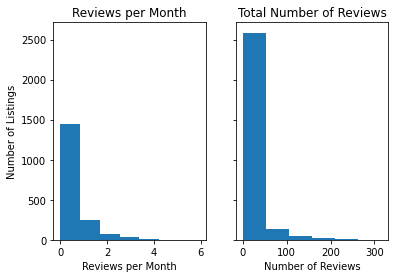

In [137]:
#initiate subplots, 2 rows and 1 column
fig, ax = plt.subplots(1, 2, sharey=True)

#create first plot 
ax[0].hist(belize_df['reviews_per_month'], 
          bins=7)
ax[0].set_xlabel("Reviews per Month")
ax[0].set_ylabel("Number of Listings")
ax[0].set_title("Reviews per Month")

#create second plot
ax[1].hist(belize_df['number_of_reviews'], 
          bins=6)
ax[1].set_xlabel("Number of Reviews")
ax[1].set_title("Total Number of Reviews")

plt.show()

#### a.	How do you choose your bin size?
I chose bin size after finding the max value of both columns. The maximum numver of reviews per month was 6 so I chose 7 bins to represent 0-6 reviews per month. For the second plot, the maximum number of reviews was 316 so I chose 6 bins to indicate bins of approximately 50 reviews.

In [60]:
print(belize_df['reviews_per_month'].agg([np.max, np.min, np.mean]))

print(belize_df['number_of_reviews'].agg([np.max, np.min, np.mean]))

amax    5.920000
amin    0.010000
mean    0.538088
Name: reviews_per_month, dtype: float64
amax    316.000000
amin      0.000000
mean     14.453505
Name: number_of_reviews, dtype: float64


#### 3.	Create a box and whisker plot for availability_365. What does this show you?
This figure shows that the range of availability is between 0 and 365 days, the majority of listings are available between 220 and 365 days with the interquartile range (shown by the whisker) extending from 220 to around 5 days, and a few outliers that are near 0 days of availability.

In [61]:
print(belize_df['availability_365'].agg([np.max, np.min, np.mean, np.std]))

amax    365.000000
amin      0.000000
mean    280.315451
std     120.617632
Name: availability_365, dtype: float64


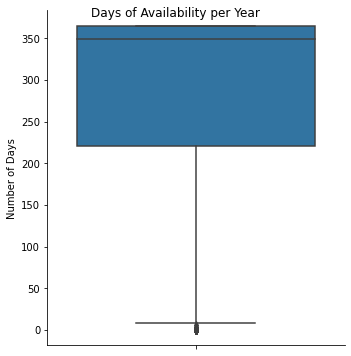

In [44]:
availability = sns.catplot(data=belize_df, 
                           y='availability_365', 
                           kind='box')
availability.fig.suptitle("Days of Availability per Year")
availability.set(ylabel="Number of Days")
plt.show()

#### 4.	What is the probability that the price for an Airbnb is under $50?
The probability that an Airbnb in this dataset is under 50 dollars is 29.3 percent.
#### a.	What do you notice about these records? Hint: look at the other columns.
The graph shows that the majority of the listings are in the lower price range with the median at 220.
#### b.	What distribution does this data most closely fit?
The distribution of the data could be log normal.

In [90]:
print(belize_df['price'].agg([np.mean, np.median, np.std, np.max, np.min]))

mean        357.102289
median      220.000000
std         563.124825
amax      11788.000000
amin         20.000000
Name: price, dtype: float64


In [79]:
belize_df['log_price'] = np.log(belize_df['price'])
print(belize_df['log_price'].agg([np.mean, np.std, np.max, np.min]))

mean    5.458456
std     0.835661
amax    9.374837
amin    2.995732
Name: log_price, dtype: float64


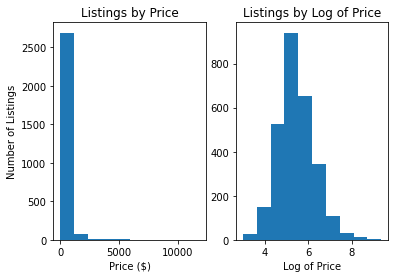

In [76]:
fig, ax = plt.subplots(1, 2, sharey=False)

ax[0].hist(belize_df['price'])
ax[0].set_title('Listings by Price')
ax[0].set_xlabel('Price ($)')
ax[0].set_ylabel('Number of Listings')

ax[1].hist(belize_df['log_price'])
ax[1].set_title('Listings by Log of Price')
ax[1].set_xlabel('Log of Price')

plt.show()

In [92]:
prob_under_50 = norm.cdf(50, 357, 563)
prob_under_50

0.2927759838151833

#### 5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

In [100]:
belize_df.agg([np.var, np.std, np.mean])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,log_price
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157,0.698330
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632,0.835661
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451,5.458456


#### a.	Why sample variance and not population variance?
The data that we have is only a snapshot of homes or rental properties in one location, not the entirety of the population.

#### b.	What is your takeaway for each metric?
-latitude and longitude have low variance and deviation because all of the listings are grouped in one global location
-the price variance is high because the range of prices is high, the deviation from the mean is also sizable
-the minimum nights variance ranges from minimum to maximum nights, but most listings fall within 5-6 days from the mean, there are outliers affecting that.
-number of reviews has a large range from 0-919, but most total number of reviews fall within 30 reviews of the mean so there are some outliers.
-reviews per month has a more narrow range and deviation because the metric is a ratio
-host listings has a large variance, but the deviation is within 50 listings of the mean indicating many outliers
-availability has a high variance and most listings fall within 120 days of the average showing some outliers

#### c.	What are the scales of measurement for each of these values? 
-price is measured in dollars
-minimum nights, and availability is measure in days
number of reviews and listings count is measured in units
reviews per month is an average of units per month

#### 6.	What percent of Airbnb listings in Belize are available 360 days a year or more?
39.5% of the Airbnb listings in this dataset are available 360 days per year or more.

In [124]:
availability_360_or_more = (belize_df['availability_365'] >= 360).sum()
percent_360_or_more = round(availability_360_or_more / belize_df['availability_365'].count()*100, 1)
percent_360_or_more

39.5

#### a.	360 days or less?
If this question is meant to be inclusive then the percentage of listings available 360 days or less is 61.6%.

If this is not meant to be inclusive, then the percentage of listings available less than 360 days is (100-39.5) = 60.5%

In [123]:
availability_360_or_less = (belize_df['availability_365'] <= 360).sum()
percent_360_or_less = round(availability_360_or_less / belize_df['availability_365'].count()*100, 1)
percent_360_or_less

61.6

#### b.	What distribution does this data most closely fit?
A right skewed normal distribution.

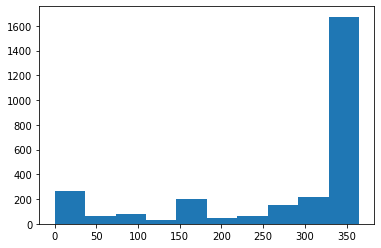

In [131]:
fig, ax = plt.subplots()

ax.hist(belize_df['availability_365'])
plt.show()

#### 7.	What minimum night count are 75% of Airnbnb listing in Belize greater than?
The first quartile for minimum nights is 1.0 nights so 75% of the Airbnb listings in this dataset have greater than 1.0 minimum nights required.

In [136]:
#a minimum of 1.0 nights is the fir quartile of the data
np.quantile(belize_df['minimum_nights'], 0.25)


1.0

#### Data Camp - Intro to Stats

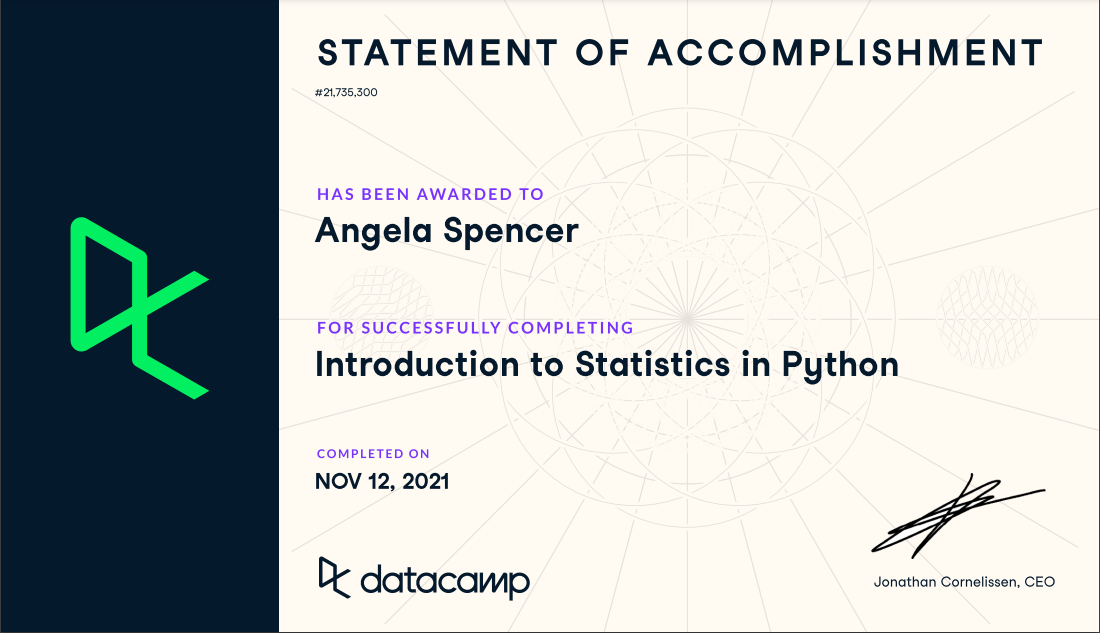